# MLB For Data Science - Predicting the Strikezone

# Merging, Cleaning, Missing Values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "dark")

In [2]:
atbats = pd.read_csv("atbats.csv")
atbats_2019 = pd.read_csv("2019_atbats.csv")

In [3]:
atbats = pd.concat([atbats, atbats_2019], axis = 0, sort = True)

In [4]:
atbats.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2.015000e+09,572761,Groundout,201500001.0,1.0,1,0.0,L,452657,L,1.0
1,2.015000e+09,518792,Double,201500001.0,1.0,1,0.0,L,452657,L,1.0
2,2.015000e+09,407812,Single,201500001.0,1.0,1,0.0,L,452657,R,1.0
3,2.015000e+09,425509,Strikeout,201500001.0,1.0,2,0.0,L,452657,R,1.0
4,2.015000e+09,571431,Strikeout,201500001.0,1.0,3,0.0,L,452657,L,1.0


In [5]:
games = pd.read_csv("games.csv")[["g_id", "date", "away_team", "home_team", "away_final_score", "home_final_score", "umpire_HP"]]
games_2019 = pd.read_csv("2019_games.csv")[["g_id", "date", "away_team", "home_team", "away_final_score", "home_final_score", "umpire_HP"]]

In [6]:
games = pd.concat([games, games_2019], axis = 0, sort = True)

In [7]:
games.head()

,away_final_score,away_team,date,g_id,home_final_score,home_team,umpire_HP
0,3.0,sln,2015-04-05,201500001.0,0.0,chn,Mike Winters
1,1.0,ana,2015-04-06,201500002.0,4.0,sea,Larry Vanover
2,2.0,atl,2015-04-06,201500003.0,1.0,mia,Jeff Nelson
3,6.0,bal,2015-04-06,201500004.0,2.0,tba,Dana DeMuth
4,8.0,bos,2015-04-06,201500005.0,0.0,phi,Gerry Davis


In [8]:
pitches = pd.read_csv("pitches.csv")
pitches_2019 = pd.read_csv("2019_pitches.csv")

In [9]:
pitches = pd.concat([pitches, pitches_2019], axis = 0, sort = True)

In [10]:
len(pitches)

3595944

In [11]:
pitches = pitches.replace("placeholder", np.NaN)

In [13]:
names = pd.read_csv("player_names.csv").rename(columns = {"id": "batter_id"})

In [14]:
atbats = pd.merge(atbats, names, on = "batter_id") #getting batter names for each row

In [15]:
atbats["batter_name"] = atbats["first_name"] + " " + atbats["last_name"]

In [16]:
atbats = atbats.drop(columns = ["first_name", "last_name"])

In [17]:
names = names.rename(columns = {"batter_id": "pitcher_id"})

In [18]:
atbats = pd.merge(atbats, names, on = "pitcher_id") #getting pitcher names for each row

In [19]:
atbats["pitcher_name"] = atbats["first_name"] + " " + atbats["last_name"]

In [20]:
atbats = atbats.drop(columns = ["first_name", "last_name"]).sort_values(by = "ab_id")

In [21]:
atbats["year"] = atbats["ab_id"].astype(str).str[:4] #the year is the first 4 digits of at bat id

In [22]:
atbats_games = pd.merge(atbats, games, on = "g_id")

In [23]:
atbats_games["date"] = pd.to_datetime(atbats_games["date"])

In [24]:
atbats_pitches = pd.merge(pitches, atbats_games, on = "ab_id")

In [25]:
atbats_pitches.head()

,ab_id,ax,ay,az,b_count,b_score,break_angle,break_length,break_y,code,...,top,batter_name,pitcher_name,year,away_final_score,away_team,date,home_final_score,home_team,umpire_HP
0,2.015000e+09,7.665,34.685,-11.960,0.0,0.0,-25.0,3.2,23.7,C,...,1.0,Matt Carpenter,Jon Lester,2015,3.0,sln,2015-04-05,0.0,chn,Mike Winters
1,2.015000e+09,12.043,34.225,-10.085,0.0,0.0,-40.7,3.4,23.7,S,...,1.0,Matt Carpenter,Jon Lester,2015,3.0,sln,2015-04-05,0.0,chn,Mike Winters
2,2.015000e+09,14.368,35.276,-11.560,0.0,0.0,-43.7,3.7,23.7,F,...,1.0,Matt Carpenter,Jon Lester,2015,3.0,sln,2015-04-05,0.0,chn,Mike Winters
3,2.015000e+09,2.104,28.354,-20.540,0.0,0.0,-1.3,5.0,23.8,B,...,1.0,Matt Carpenter,Jon Lester,2015,3.0,sln,2015-04-05,0.0,chn,Mike Winters
4,2.015000e+09,-10.280,21.774,-34.111,1.0,0.0,18.4,12.0,23.8,B,...,1.0,Matt Carpenter,Jon Lester,2015,3.0,sln,2015-04-05,0.0,chn,Mike Winters


In [26]:
atbats_pitches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3458953 entries, 0 to 3458952
Data columns (total 59 columns):
ab_id               float64
ax                  float64
ay                  float64
az                  float64
b_count             float64
b_score             float64
break_angle         float64
break_length        float64
break_y             float64
code                object
end_speed           float64
event_num           int64
nasty               float64
on_1b               float64
on_2b               float64
on_3b               float64
outs                float64
pfx_x               float64
pfx_z               float64
pitch_num           float64
pitch_type          object
px                  float64
pz                  float64
s_count             float64
spin_dir            float64
spin_rate           float64
start_speed         float64
sz_bot              float64
sz_top              float64
type                object
type_confidence     float64
vx0                 floa

In [27]:
def missing_props(df):
    missing_values = []
    for i in df.columns:
        missing_values.append(round(df[i].isnull().sum() / len(df), 3))
    missing_props = pd.DataFrame(list(zip(df.columns, missing_values)), columns = ["Var", "Prop_Missing"]).sort_values(by = "Prop_Missing", ascending = False)
    
    return missing_props

In [28]:
missing_props(atbats_pitches)

,Var,Prop_Missing
30,type_confidence,0.175
39,zone,0.175
24,spin_dir,0.175
25,spin_rate,0.175
12,nasty,0.175
58,umpire_HP,0.171
22,pz,0.006
26,start_speed,0.006
1,ax,0.006
31,vx0,0.006


# Feature Engineering

## Strikezone Flag

In [29]:
atbats_pitches["Strikezone?"] = np.where((np.abs(atbats_pitches["px"] * 12) <= 9.97) & (atbats_pitches["pz"] * 12 <= 44.08) & (atbats_pitches["pz"] * 12 >= 18.29), True, False)

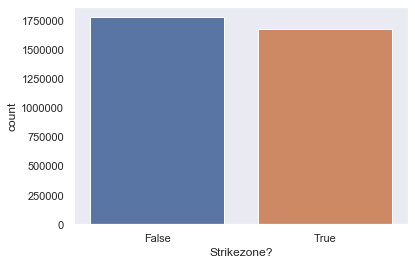

In [30]:
sns.countplot(atbats_pitches["Strikezone?"])

## Batting and Pitching Teams

In [31]:
atbats_pitches["batting_team"] = np.where(atbats_pitches["top"] == 1, atbats_pitches["away_team"], atbats_pitches["home_team"])
atbats_pitches["pitching_team"] = np.where(atbats_pitches["top"] == 1, atbats_pitches["home_team"], atbats_pitches["away_team"])

## Ball Types

In [32]:
atbats_pitches["Z Call"] = np.where(atbats_pitches["pz"] * 12 >= 44.08, "High", np.where(atbats_pitches["pz"] * 12 <= 18.29, "Low", np.NaN))

In [33]:
atbats_pitches["X Call"] = np.where(((atbats_pitches["px"] * 12 <= -9.97) & (atbats_pitches["stand"] == "L")) | ((atbats_pitches["px"] * 12 >= 9.97) & (atbats_pitches["stand"] == "R")), "Outside", np.where(((atbats_pitches["px"] * 12 <= -9.97) & (atbats_pitches["stand"] == "R")) | ((atbats_pitches["px"] * 12 >= 9.97) & (atbats_pitches["stand"] == "L")), "Inside", np.NaN))
                                    
                                    

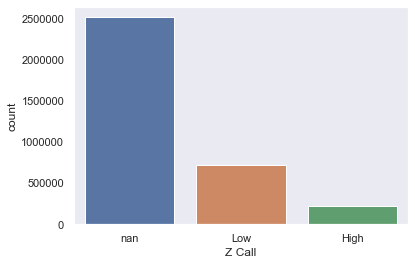

In [34]:
sns.countplot(atbats_pitches["Z Call"])

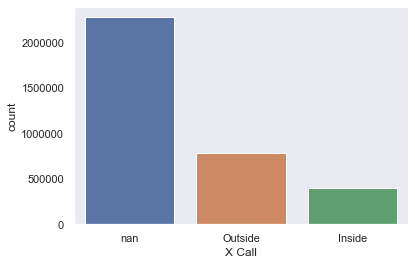

In [35]:
sns.countplot(atbats_pitches["X Call"])

In [36]:
outside = atbats_pitches[atbats_pitches["X Call"] == "Outside"]
inside = atbats_pitches[atbats_pitches["X Call"] == "Inside"]

In [37]:
len(outside[outside["code"] == "P"])

652

In [38]:
len(inside[inside["code"] == "P"])

0

In [39]:
atbats_pitches["Location"] = np.where((atbats_pitches["X Call"] == "nan") & (atbats_pitches["Z Call"] != "nan"), atbats_pitches["Z Call"], np.where((atbats_pitches["Z Call"] == "nan") & (atbats_pitches["X Call"] != "nan"), atbats_pitches["X Call"], np.where((atbats_pitches["X Call"] != "nan") & (atbats_pitches["Z Call"] != "nan"), atbats_pitches["Z Call"] + " and " + atbats_pitches["X Call"], "Strikezone")))



In [40]:
atbats_pitches = atbats_pitches.drop(columns = ["X Call", "Z Call"])

## Cumulative Averages

In [41]:
atbats_pitches["ab_id"] = atbats_pitches["ab_id"].astype(str)

In [42]:
events = atbats_pitches[["ab_id", "date", "pitcher_name", "batter_name", "event"]].drop_duplicates()

### Creating Event Flags

In [43]:
events["year"] = events["date"].dt.year

events["PA?"] = np.where(events["event"].isin(["Runner Out"]), 0, 1)
events["AB?"] = np.where(events["event"].isin(["Walk", "Intent Walk", "Sac Fly", "Sac Fly DP", "Sac Bunt", "Sacrifice Bunt DP", "Batter Interference", "Catcher Interference", "Runner Out", "Hit By Pitch"]), 0, 1)

events["Hit?"] = np.where(events["event"].isin(["Single", "Double", "Triple", "Home Run"]), 1, 0)
events["Single?"] = np.where(events["event"].isin(["Single"]), 1, 0)
events["Double?"] = np.where(events["event"].isin(["Double"]), 1, 0)
events["Triple?"] = np.where(events["event"].isin(["Triple"]), 1, 0)
events["Home Run?"] = np.where(events["event"].isin(["Home Run"]), 1, 0)
events["Walk?"] = np.where(events["event"].isin(["Walk"]), 1, 0)
events["Intent Walk?"] = np.where(events["event"].isin(["Intent Walk"]), 1, 0)
events["HBP?"] = np.where(events["event"].isin(["Hit By Pitch"]), 1, 0)
events["Sac Fly?"] = np.where(events["event"].isin(["Sac Fly", "Sac Fly DP"]), 1, 0)

events = events.reset_index().drop(columns = "index")

In [44]:
events.head()

,ab_id,date,pitcher_name,batter_name,event,year,PA?,AB?,Hit?,Single?,Double?,Triple?,Home Run?,Walk?,Intent Walk?,HBP?,Sac Fly?
0,2015000001.0,2015-04-05,Jon Lester,Matt Carpenter,Groundout,2015,1,1,0,0,0,0,0,0,0,0,0
1,2015000002.0,2015-04-05,Jon Lester,Jason Heyward,Double,2015,1,1,1,0,1,0,0,0,0,0,0
2,2015000003.0,2015-04-05,Jon Lester,Matt Holliday,Single,2015,1,1,1,1,0,0,0,0,0,0,0
3,2015000004.0,2015-04-05,Jon Lester,Jhonny Peralta,Strikeout,2015,1,1,0,0,0,0,0,0,0,0,0
4,2015000005.0,2015-04-05,Jon Lester,Matt Adams,Strikeout,2015,1,1,0,0,0,0,0,0,0,0,0


### Batter Averages

In [45]:
cum_sum_batters = events.groupby(["year", "batter_name"]).cumsum().reset_index().drop(columns = "index")

In [46]:
indices = events[["ab_id", "date", "pitcher_name", "batter_name"]]

In [47]:
events2 = pd.concat([indices, cum_sum_batters], axis = 1)

In [48]:
events2["Batter AB"] = events2["AB?"]

events2["Batter AVG"] = round(events2["Hit?"] / events2["AB?"], 3)

events2["Batter OBP"] = round((events2["Hit?"] + events2["Walk?"] + events2["Intent Walk?"] + events2["HBP?"]) / (events2["AB?"] + events2["Walk?"] + events2["HBP?"] + events2["Intent Walk?"] + events2["Sac Fly?"]), 3)

events2["Batter TB"] = events2["Single?"] + (2*events2["Double?"]) + (3*events2["Triple?"]) + (4*events2["Home Run?"]) 
events2["Batter SLG"] = round(events2["Batter TB"] / events2["AB?"], 3)

events2["Batter OPS"] = events2["Batter OBP"] + events2["Batter SLG"]


In [49]:
batter_stats = events2[["ab_id", "date", "pitcher_name", "batter_name", "Batter AB", "Batter AVG", "Batter OBP", "Batter SLG", "Batter OPS"]]

### Pitcher Averages

In [50]:
cum_sum_pitchers = events.groupby(["year", "pitcher_name"]).cumsum().reset_index().drop(columns = "index")

In [51]:
events3 = pd.concat([indices, cum_sum_pitchers], axis = 1)

In [52]:
events3["Pitcher AB"] = events3["AB?"]

events3["Pitcher AVG"] = round(events3["Hit?"] / events3["AB?"], 3)

events3["Pitcher OBP"] = round((events3["Hit?"] + events3["Walk?"] + events3["Intent Walk?"] + events3["HBP?"]) / (events3["AB?"] + events3["Walk?"] + events3["HBP?"] + events3["Intent Walk?"] + events3["Sac Fly?"]), 3)

events3["Pitcher TB"] = events3["Single?"] + (2*events3["Double?"]) + (3*events3["Triple?"]) + (4*events3["Home Run?"]) 
events3["Pitcher SLG"] = round(events3["Pitcher TB"] / events3["AB?"], 3)

events3["Pitcher OPS"] = events3["Pitcher OBP"] + events3["Pitcher SLG"]


In [53]:
pitcher_stats = events3[["ab_id", "date", "pitcher_name", "batter_name", "Pitcher AB", "Pitcher AVG", "Pitcher OBP", "Pitcher SLG", "Pitcher OPS"]]


In [54]:
all_avgs = pd.merge(batter_stats, pitcher_stats, on = ["ab_id", "date", "pitcher_name", "batter_name"])

In [55]:
all_avgs.tail()

,ab_id,date,pitcher_name,batter_name,Batter AB,Batter AVG,Batter OBP,Batter SLG,Batter OPS,Pitcher AB,Pitcher AVG,Pitcher OBP,Pitcher SLG,Pitcher OPS
890869,2019185240.0,2019-09-28,Jalen Beeks,Jonathan Davis,69,0.188,0.250,0.246,0.496,372,0.282,0.355,0.441,0.796
890870,2019185241.0,2019-09-28,Jalen Beeks,Danny Jansen,314,0.220,0.289,0.389,0.678,373,0.282,0.354,0.440,0.794
890871,2019185242.0,2019-09-28,Jalen Beeks,Richard Urena,67,0.254,0.286,0.343,0.629,374,0.281,0.353,0.439,0.792
890872,2019185244.0,2019-09-28,Ken Giles,Matt Duffy,119,0.252,0.331,0.336,0.667,174,0.201,0.272,0.328,0.600
890873,2019185245.0,2019-09-28,Ken Giles,Michael Perez,42,0.190,0.320,0.286,0.606,175,0.200,0.271,0.326,0.597


In [56]:
all_avgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890874 entries, 0 to 890873
Data columns (total 14 columns):
ab_id           890874 non-null object
date            890874 non-null datetime64[ns]
pitcher_name    890874 non-null object
batter_name     890874 non-null object
Batter AB       890874 non-null int64
Batter AVG      890359 non-null float64
Batter OBP      890712 non-null float64
Batter SLG      890359 non-null float64
Batter OPS      890359 non-null float64
Pitcher AB      890874 non-null int64
Pitcher AVG     890371 non-null float64
Pitcher OBP     890863 non-null float64
Pitcher SLG     890371 non-null float64
Pitcher OPS     890371 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(3)
memory usage: 102.0+ MB


## Game Situation Statistics

### Inning, Top or Bottom of Inning, Outs, Teams

In [57]:
game_stats = atbats_pitches[["ab_id", "b_count", "s_count", "outs", "inning", "top", "pitching_team", "batting_team", "on_1b", "on_2b", "on_3b", "p_throws", "stand"]]

In [58]:
game_stats2 = pd.merge(all_avgs, game_stats, on = "ab_id", how = "left")

### Count

In [59]:
game_stats2["b_count"] = game_stats2["b_count"].astype(str)
game_stats2["s_count"] = game_stats2["s_count"].astype(str)


game_stats2["Count"] = game_stats2["b_count"] + "-" + game_stats2["s_count"]

### Same Side?

In [60]:
game_stats2["Same Side?"] = game_stats2["p_throws"] == game_stats2["stand"]

### Bases Occupied

In [61]:
game_stats2["Bases Occupied"] = np.where((game_stats2["on_1b"] == 1) & (game_stats2["on_2b"] == 1) & (game_stats2["on_3b"] == 1), "Bases Loaded", np.where((game_stats2["on_1b"] == 1) & (game_stats2["on_2b"] == 1) & (game_stats2["on_3b"] == 0), "1st and 2nd", np.where((game_stats2["on_1b"] == 1) & (game_stats2["on_2b"] == 0) & (game_stats2["on_3b"] == 1), "1st and 3rd", np.where((game_stats2["on_1b"] == 0) & (game_stats2["on_2b"] == 1) & (game_stats2["on_3b"] == 1), "2nd and 3rd", np.where((game_stats2["on_1b"] == 1) & (game_stats2["on_2b"] == 0) & (game_stats2["on_3b"] == 0), "1st", np.where((game_stats2["on_1b"] == 0) & (game_stats2["on_2b"] == 1) & (game_stats2["on_3b"] == 0), "2nd", np.where((game_stats2["on_1b"] == 0) & (game_stats2["on_2b"] == 0) & (game_stats2["on_3b"] == 1), "3rd", "Bases Empty")))))))



### Score Difference

In [62]:
atbats_pitches["Score Diff"] = atbats_pitches["p_score"] - atbats_pitches["b_score"]

In [63]:
game_stats2["Score Diff"] = atbats_pitches["Score Diff"]

In [64]:
game_stats3 = game_stats2.drop(columns = ["on_1b", "on_2b", "on_3b", "b_count", "s_count"])

## Previous Pitch Statistics

### Pitch Number of At-Bat

In [65]:
game_stats3["Pitch Num"] = atbats_pitches["pitch_num"]

In [66]:
game_stats3["Pitch Num"] = game_stats3["Pitch Num"].astype(str)

### Previous Pitch Code, Type, Location, Event, and Zone

In [67]:
atbats_pitches["Previous Code"] = atbats_pitches["code"].shift(periods = 1)
atbats_pitches["Previous Location"] = atbats_pitches["Location"].shift(periods = 1)
atbats_pitches["Previous Type"] = atbats_pitches["pitch_type"].shift(periods = 1)

atbats["ab_id"] = atbats["ab_id"].astype(str)
atbats["Previous Event"] = atbats["event"].shift(periods = 1)

In [68]:
atbats_pitches["pitch_id"] = atbats_pitches.index

In [69]:
first_pitch_inning = list(atbats_pitches[["g_id", "pitch_id", "inning", "top"]].groupby(["g_id", "inning", "top"]).first().reset_index()["pitch_id"])

first_event_inning = list(atbats[["g_id", "ab_id", "inning", "top"]].groupby(["g_id", "inning", "top"]).first().reset_index()["ab_id"])


In [70]:
atbats_pitches["Previous Code"] = np.where(atbats_pitches["pitch_id"].isin(first_pitch_inning), "First Pitch", atbats_pitches["Previous Code"])

atbats_pitches["Previous Location"] = np.where(atbats_pitches["pitch_id"].isin(first_pitch_inning), "First Pitch", atbats_pitches["Previous Location"])

atbats_pitches["Previous Type"] = np.where(atbats_pitches["pitch_id"].isin(first_pitch_inning), "First Pitch", atbats_pitches["Previous Type"])

atbats["Previous Event"] = np.where(atbats["ab_id"].isin(first_event_inning), "First Event", atbats["Previous Event"])


In [71]:
game_stats3["Previous Code"] = atbats_pitches["Previous Code"]

game_stats3["Previous Location"] = atbats_pitches["Previous Location"]

game_stats3["Previous Type"] = atbats_pitches["Previous Type"]

previous_events = atbats[["ab_id", "Previous Event"]]
game_stats3 = pd.merge(game_stats3, previous_events, on = "ab_id")

## Other Statistics

### Year and Month

In [72]:
game_stats3["year"] = atbats_pitches["date"].dt.year.astype(str)
game_stats3["month"] = atbats_pitches["date"].dt.month.astype(str)

### Pitch Number of Game

In [73]:
cum_count = list(atbats_pitches[["g_id", "pitcher_name"]].groupby(["g_id", "pitcher_name"]).cumcount())

In [74]:
game_stats3["Pitch Count"] = np.array(cum_count) + 1

### Strikezone Percentage of Game

In [75]:
atbats_pitches["Pitch Count"] = np.array(cum_count) + 1

atbats_pitches["Strikezone?"] = np.where(atbats_pitches["Strikezone?"] == True, 1, 0)

In [76]:
cum_count2 = atbats_pitches[["g_id", "pitcher_name", "Strikezone?"]].groupby(["g_id", "pitcher_name"]).cumsum()

In [77]:
atbats_pitches["Strike Count"] = cum_count2

atbats_pitches["Strike Prop"] = atbats_pitches["Strike Count"] / atbats_pitches["Pitch Count"]

In [78]:
atbats_pitches_sort = atbats_pitches.sort_values(by = ["g_id", "pitcher_name", "Pitch Count"])

atbats_pitches_sort["Strike Prop"] = atbats_pitches_sort["Strike Prop"].shift(periods = 1)

In [79]:
first_pitch_game = list(atbats_pitches[["g_id", "pitcher_name", "pitch_id"]].groupby(["g_id", "pitcher_name"]).first()["pitch_id"])

In [80]:
atbats_pitches_sort["Strike Prop"] = np.where(atbats_pitches_sort["pitch_id"].isin(first_pitch_game), 0, atbats_pitches_sort["Strike Prop"])

game_stats3["Strike Prop"] = atbats_pitches_sort["Strike Prop"]

## Adding Strikezone Flag (Target Variable)

In [81]:
game_stats3["Strikezone"] = atbats_pitches["Strikezone?"]

game_stats3["Strikezone"] = np.where(game_stats3["Strikezone"] == True, 1, 0)

In [82]:
len(game_stats3)

3458953

In [83]:
len(atbats_pitches)

3458953

## Filtering

### Intentional Walks

In [84]:
events = atbats_pitches[["ab_id", "event"]].drop_duplicates()

In [85]:
game_stats4 = pd.merge(game_stats3, events, on = "ab_id")

game_stats5 = game_stats4[game_stats4["event"] != "Intent Walk"].drop(columns = ["ab_id", "event", "date"])

In [86]:
len(game_stats5)

3441031

### Uncommon Categorical Values

In [87]:
cat_columns = game_stats5.select_dtypes("object").columns

In [88]:
for i in cat_columns:
    flags = pd.DataFrame(game_stats5[i].value_counts() < 1000)
    drop = flags[flags[i] == True].index
    game_stats5 = game_stats5[~game_stats5[i].isin(drop)]

In [89]:
len(game_stats5)

3024752

### Low Sample Sizes of At Bats

In [92]:
game_stats5 = game_stats5[(game_stats5["Batter AB"] >= 30) & (game_stats5["Pitcher AB"] >= 30)]

In [93]:
len(game_stats5)

2574668

# Modeling 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler 

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import GridSearchCV

#import xgboost as xgb


import warnings
warnings.filterwarnings("ignore")

## A General Model

In [94]:
stats_sample = game_stats5.sample(n = 500000).drop(columns = ["pitcher_name", "batter_name"])

In [98]:
stats_sample["Strikezone"].value_counts() / len(stats_sample)

0    0.514098
1    0.485902
Name: Strikezone, dtype: float64

In [99]:
no_players_dummies = pd.get_dummies(stats_sample)

In [100]:
no_players_dummies.shape

(500000, 186)

In [124]:
x_vals = no_players_dummies.drop(columns = "Strikezone").fillna(0)
y_val = no_players_dummies["Strikezone"].values

In [125]:
scaler = StandardScaler() 
x_vals_scaled = scaler.fit_transform(x_vals)

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x_vals_scaled, y_val, test_size = 0.3)

### Logistic Regression

In [127]:
mod1 = LogisticRegression()

In [128]:
mod1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
train_score1 = cross_val_score(mod1, x_train, y_train, cv = 5)
test_score1 = cross_val_score(mod1, x_test, y_test, cv = 5)

In [130]:
np.mean(train_score1), np.mean(test_score1)

(0.5664599993114507, 0.5660400000000001)

In [131]:
c = list(x_vals.columns)

imp1 = pd.DataFrame(c, mod1.coef_[0]).reset_index().sort_values(by = "index", ascending = False)

imp1 = imp1.rename(columns = {0: "Feature", "index": "Importance"})
imp1["Importance"] = imp1["Importance"] ** 2

imp1[["Feature", "Importance"]].head(10)

,Feature,Importance
141,Previous Type_FF,0.732157
149,Previous Type_SL,0.406124
143,Previous Type_FT,0.301897
138,Previous Type_CH,0.285209
139,Previous Type_CU,0.228751
148,Previous Type_SI,0.222302
140,Previous Type_FC,0.158926
146,Previous Type_KC,0.076455
101,Pitch Num_1.0,0.055646
142,Previous Type_FS,0.048195


### Random Forest

In [132]:
mod2 = RandomForestClassifier()

In [133]:
mod2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [134]:
train_score2 = mod2.score(x_train, y_train)
test_score2 = mod2.score(x_test, y_test)

In [135]:
train_score2, test_score2

(0.9847057142857143, 0.5320133333333333)

In [136]:
imp2 = pd.DataFrame(c, mod2.feature_importances_).reset_index().sort_values(by = "index", ascending = False).head(20)

imp2 = imp2.rename(columns = {0: "Feature", "index": "Importance"})

imp2[["Feature", "Importance"]].head(10)

,Feature,Importance
0,Batter AB,0.044374
5,Pitcher AB,0.044231
4,Batter OPS,0.043032
3,Batter SLG,0.042957
9,Pitcher OPS,0.042835
8,Pitcher SLG,0.042708
2,Batter OBP,0.042561
1,Batter AVG,0.042373
7,Pitcher OBP,0.042055
6,Pitcher AVG,0.042007


### Decision Tree

In [ ]:
mod3 = DecisionTreeClassifier()

In [ ]:
mod3.fit(x_train, y_train)

In [ ]:
train_score3 = mod3.score(x_train, y_train)
test_score3 = mod3.score(x_test, y_test)

In [ ]:
train_score3, test_score3

In [ ]:
imp3 = pd.DataFrame(c, mod3.feature_importances_).reset_index().sort_values(by = "index", ascending = False).head(20)

imp3 = imp3.rename(columns = {0: "Feature", "index": "Importance"})

imp3[["Feature", "Importance"]].head(10)

### AdaBoost

In [143]:
mod4 = AdaBoostClassifier()

In [144]:
mod4.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [145]:
train_score4 = mod4.score(x_train, y_train)
test_score4 = mod4.score(x_test, y_test)

In [146]:
train_score4, test_score4

(0.5646371428571428, 0.56446)

In [147]:
imp4 = pd.DataFrame(c, mod4.feature_importances_).reset_index().sort_values(by = "index", ascending = False).head(40)

imp4 = imp4.rename(columns = {0: "Feature", "index": "Importance"})

imp4[["Feature", "Importance"]].head(10)

,Feature,Importance
16,Strike Prop,0.06
7,Pitcher OBP,0.04
81,Count_0.0-0.0,0.04
15,Pitch Count,0.04
90,Count_3.0-0.0,0.04
101,Pitch Num_1.0,0.04
4,Batter OPS,0.04
83,Count_0.0-2.0,0.04
177,year_2019,0.04
86,Count_1.0-2.0,0.02


### Hyperparameter Tuning

In [ ]:
#lr = LogisticRegression()

#grid = {'max_iter' : [2000], 'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20), 'solver' : ['liblinear']}

#grid_lr = GridSearchCV(lr, param_grid = grid, verbose = True, n_jobs = -1)

#grid_lr.fit(x_train, y_train)

## Modeling Individual Pitchers

In [ ]:
def model_pitcher(game_stats5, pitcher, mod):
    
    ind_pitcher = game_stats5[game_stats5["pitcher_name"] == pitcher].drop(columns = ["pitcher_name", "batter_name"])
    
    ind_pitcher_dummies = pd.get_dummies(ind_pitcher)
    
    x_vals = ind_pitcher_dummies.drop(columns = "Strikezone").fillna(0)
    y_val = ind_pitcher_dummies["Strikezone"].values
    
    train_array = []
    test_array = []
    
    for i in range(1):
    
        x_train, x_test, y_train, y_test = train_test_split(x_vals, y_val, test_size = 0.4)
    
        mod.fit(x_train, y_train)
    
        train_score = mod.score(x_train, y_train)
        test_score = mod.score(x_test, y_test)
        
        train_array.append(train_score)
        test_array.append(test_score)
        
    baseline = len(ind_pitcher_dummies[ind_pitcher_dummies["Strikezone"] == 1]) / len(ind_pitcher_dummies)
    
    return pitcher, round(baseline, 4), round(np.mean(train_array), 4), round(np.mean(test_array), 4)

    

In [ ]:
top100_pitchers = list(game_stats5[["pitcher_name"]].groupby("pitcher_name").size().sort_values(ascending = False).index[0:100])

In [ ]:
pitcher_models = [model_pitcher(game_stats5, i, LogisticRegression()) for i in top100_pitchers]

In [ ]:
model_df = pd.DataFrame(pitcher_models)

model_df[1] = np.where(model_df[1] < 0.5, 1 - model_df[1], model_df[1])

In [ ]:
model_df["Spread"] = model_df[3] - model_df[1]

In [ ]:
model_df = model_df.rename(columns = {0: "Pitcher", 1: "Baseline", 2: "Train Accuracy", 3: "Test Accuracy"})

In [ ]:
model_df_top_acc = model_df.sort_values(by = "Test Accuracy", ascending = False).head(10)
model_df_bot_acc = model_df.sort_values(by = "Test Accuracy").head(10)

model_df_top_spread = model_df.sort_values(by = "Spread", ascending = False).head(10)
model_df_bot_spread = model_df.sort_values(by = "Spread").head(10)

### Plotting Model Effectiveness

In [ ]:
sns.barplot(model_df_top_acc["Pitcher"], model_df_top_acc["Test Accuracy"])
plt.xticks(rotation = 90)
plt.title("The 10 Most Predictable MLB Pitchers (2015-2019)")
plt.ylim(0.58, 0.65)
plt.show()

In [ ]:
sns.barplot(model_df_bot_acc["Pitcher"], model_df_bot_acc["Test Accuracy"])
plt.xticks(rotation = 90)
plt.title("The 10 Least Predictable MLB Pitchers (2015-2019)")
plt.ylim(0.5, 0.58)
plt.show()

In [ ]:
sns.barplot(model_df_top_spread["Pitcher"], model_df_top_spread["Spread"])
plt.xticks(rotation = 90)
plt.title("The 10 Most Effecitvely Modeled MLB Pitchers (2015-2019)")
plt.show()

In [ ]:
sns.barplot(model_df_bot_spread["Pitcher"], model_df_bot_spread["Spread"])
plt.xticks(rotation = 90)
plt.title("The 10 Least Effecitvely Modeled MLB Pitchers (2015-2019)")
plt.show()